In [1]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky
from matplotlib.pyplot import *

In [13]:
p, f, __ = prjlib.analysis_init(t='la',freq='coadd',rlmin=500,rlmax=3000,exttag='')
#p, f, __ = prjlib.analysis_init(t='la',freq='coadd',rlmin=500,rlmax=3000,exttag='_iso')
wn = prjlib.wfac('la')

In [14]:
q = 'TT'
l, al = np.loadtxt(p.quad.f[q].al,unpack=True,usecols=(0,1))
l, ml = np.loadtxt(p.quad.f[q].mfcl,unpack=True,usecols=(0,1))
l, n0 = np.loadtxt(p.quad.f[q].n0bs,unpack=True,usecols=(0,1))
l, cl, xl, kk = np.loadtxt(p.quad.f[q].mcls,unpack=True,usecols=(0,1,3,4))
fac = 1.
#if q!='TT': fac = wla4/mla4
n0 *= fac
ml *= fac

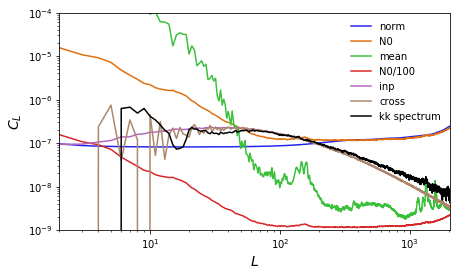

In [18]:
pl.plot_1dstyle(fsize=[7,4],xmin=2,xmax=2048,xlog=True,ylog=True,ymin=1e-9,ymax=1e-4)
cp = cl - n0 - ml + n0/100.
plot(l,al,label='norm')
plot(l,n0,label='N0')
plot(l,ml,label='mean')
plot(l,n0/100.,label='N0/100')
plot(l,kk,label='inp')
plot(l,xl,label='cross')
plot(l,cp,label='kk spectrum',color='k')
legend()

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


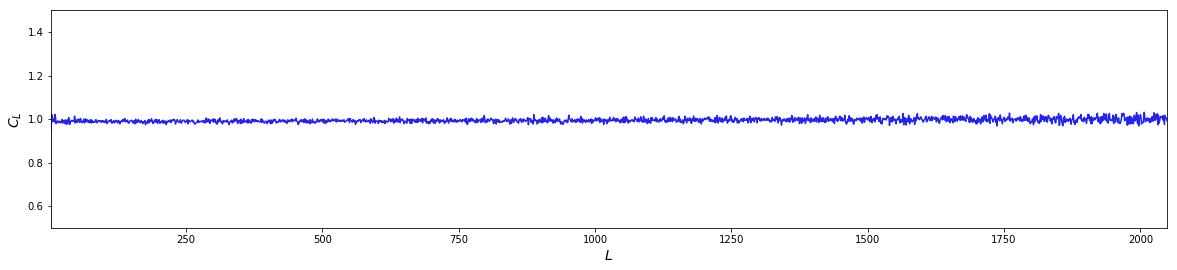

In [5]:
pl.plot_1dstyle(xmin=2,xmax=2048,ymin=0.5,ymax=1.5)
plot(xl/kk)